In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

In [2]:
#Import tables from Data and convert them to dataframes.
reveal_data =  pd.read_csv("Data/Reveal_EEO1_for_2016.csv")
tech_sector_data = pd.read_csv("Data/Tech_sector_diversity_demographics_2016.csv")
tech_salaries = pd.read_csv("Data/Top tech companies comparison 2014_2015.csv")
diversity_df = pd.read_csv("Data\Employee Diversity in Tech.csv",sep="\t")
survey = pd.read_csv("Data\Data_Professional_Salary_Survey_Responses.csv",encoding='latin1')

reveal_data_df = pd.DataFrame(reveal_data)
tech_sector_data_df = pd.DataFrame(tech_sector_data)
tech_salaries = pd.DataFrame(tech_salaries)

In [3]:
# Gender Breakdown: Run basic calculations
gender_data = tech_sector_data_df.groupby("job_category")["count"].sum().to_frame().reset_index()
gender_data = tech_sector_data_df.groupby("gender")["count"].sum().to_frame().reset_index()

tech_sector_data_df = tech_sector_data_df[tech_sector_data_df["job_category"].isin(["Professionals", "Managers","Executives"])]
tech_sector_data_df = tech_sector_data_df[tech_sector_data_df["gender"].isin(["Female", "Male","Both"])]

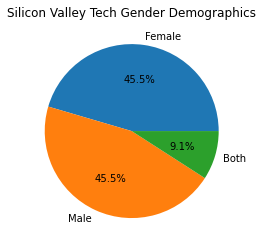

In [4]:
# Gender Pie Chart
counts =tech_sector_data_df.gender.value_counts()
plt.pie(counts.values,labels=counts.index.values,autopct='%1.1f%%')
plt.title("Silicon Valley Tech Gender Demographics")

plt.show()

In [5]:
#Convert count column's values to numeric in reveal_data_df

reveal_data_df = reveal_data_df.loc[reveal_data_df["count"] != "na",:]
reveal_data_df["count"]= pd.to_numeric(reveal_data_df["count"]) 

In [6]:
profession_data = reveal_data_df[reveal_data_df["job_category"].isin(["Professionals", "Managers","Executives"])]
gender_data = profession_data[profession_data["gender"].isin(["male","female"])]
# Female data
female_data_df = gender_data[gender_data["gender"]=="female"]

#Male data
male_data_df = gender_data[gender_data["gender"]=="male"]

Text(0.5, 1.0, 'Total of female working in Silicon Valley based on ethnicity')

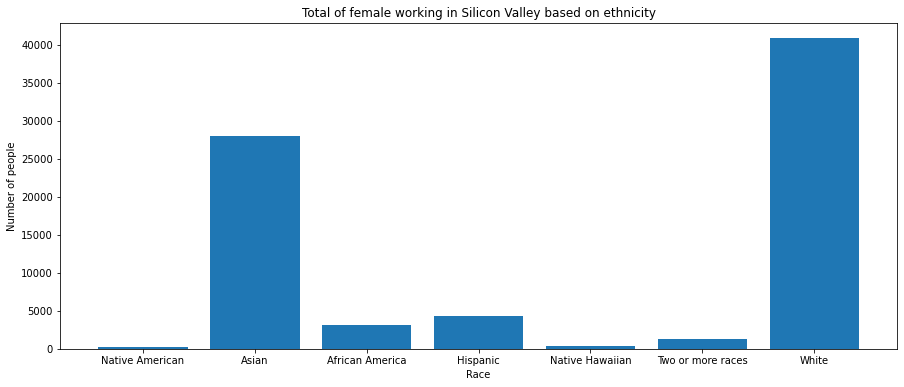

In [7]:
race_data =female_data_df.groupby("race")["count"]
race_data_plot = race_data.sum().to_frame().reset_index()


race_amount = race_data_plot["count"]
race_labels = ("Native American", "Asian", "African America", "Hispanic","Native Hawaiian", "Two or more races", "White")

plt.figure(figsize=(15,6))
plt.bar(race_labels, race_amount)
plt.xlabel("Race")
plt.ylabel("Number of people")
plt.title("Total of female working in Silicon Valley based on ethnicity")

# plt.show()
# plt.tight_layout()


Text(0.5, 1.0, 'Total of male working in Silicon Valley based on ethnicity')

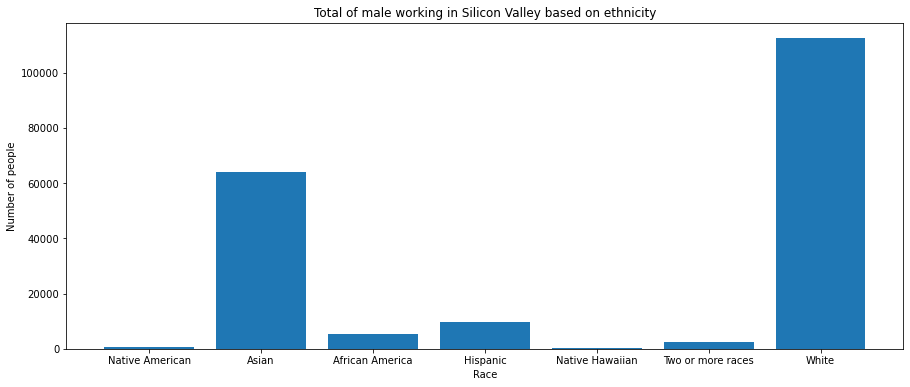

In [8]:
race_data =male_data_df.groupby("race")["count"]
race_data_plot = race_data.sum().to_frame().reset_index()

race_amount = race_data_plot["count"]
race_labels = ("Native American", "Asian", "African America", "Hispanic","Native Hawaiian", "Two or more races", "White")

plt.figure(figsize=(15,6))
plt.bar(race_labels, race_amount)
plt.xlabel("Race")
plt.ylabel("Number of people")
plt.title("Total of male working in Silicon Valley based on ethnicity")

# plt.show()
# plt.tight_layout()


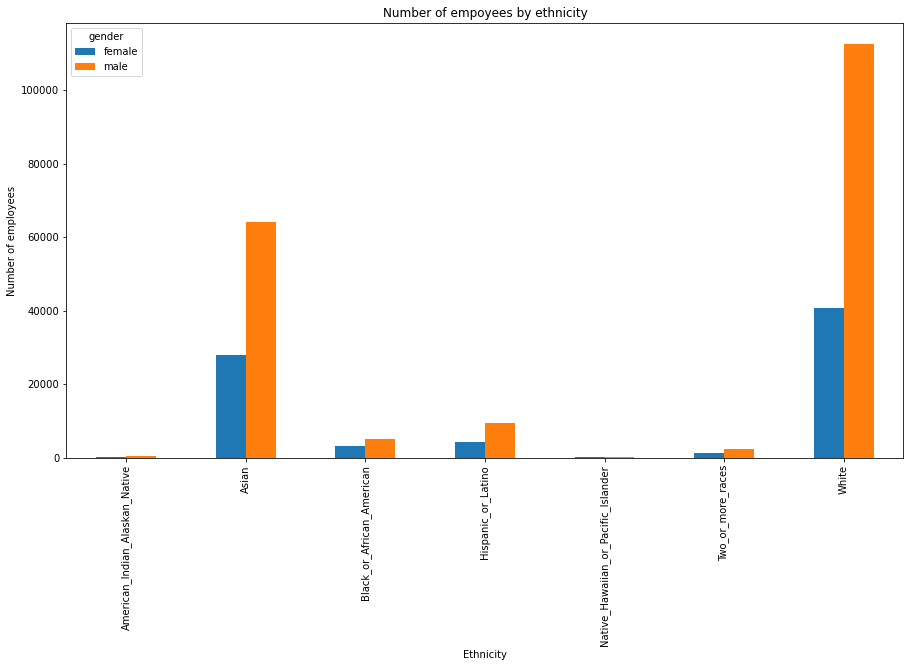

In [9]:
#Create bar chart showing number of male and female by ethnicity.


gender_race = gender_data.groupby(["race","gender"])["count"].sum().reset_index()


gender_race.pivot(index = "race",columns = "gender", values = "count").plot(kind="bar",figsize = (15,8))

plt.xlabel ("Ethnicity")
plt.ylabel ("Number of employees")
plt.title("Number of empoyees by ethnicity")

plt.show()

In [10]:
# #Create pie chart to show difference betwwen male and femle representation.
# number_gender = gender_data.groupby ("gender")["count"].sum().to_frame()
# pie_data = number_gender['count']

# labels = ("Female", "Male")
# explode = (0.1, 0)
# number_gender

# plt.title("Percentage of male and female in Silicon Valley")
# plt.pie(pie_data, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True)



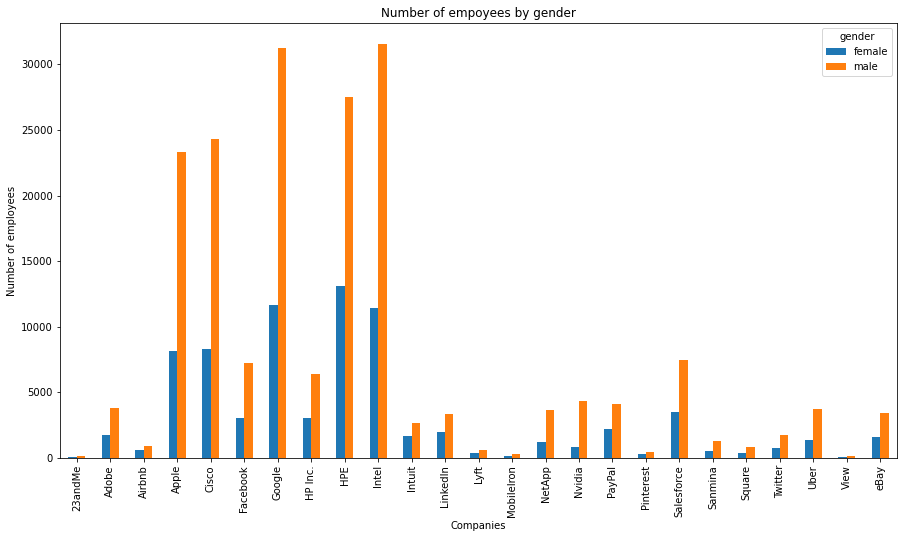

In [11]:

gender_per_company = gender_data.groupby(["company","gender"])["count"].sum().reset_index()
gender_per_company.pivot(index = "company",columns = "gender", values = "count").plot(kind="bar",figsize = (15,8))

plt.xlabel ("Companies")
plt.ylabel ("Number of employees")
plt.title("Number of empoyees by gender")

plt.show()

In [12]:
tech_salaries_set = pd.DataFrame(tech_salaries[["Employer Name","Early Career Median Pay","Mid-Career Median Pay","Years of Experience"]])

# Remove SpaceX as an incomplete record 
tech_salaries_set = tech_salaries_set[(tech_salaries_set["Employer Name"] != "SpaceX")].reset_index(drop=True)

#Format to integers and calculate means of pay categories
tech_salaries_set[["Early Career Median Pay","Mid-Career Median Pay"]] = tech_salaries_set[["Early Career Median Pay","Mid-Career Median Pay"]].replace('[\$\,\.]',"",regex=True).astype(int)

companies = tech_salaries_set.mean()

In [13]:
# Reset row 2 as column names, remove empty rows, reset index
survey.columns = survey.iloc[2]
survey_cleaned = survey.drop([0,1,2])
survey_cleaned.reset_index(drop=True)

2,Survey Year,Timestamp,SalaryUSD,Country,PostalCode,PrimaryDatabase,YearsWithThisDatabase,OtherDatabases,EmploymentStatus,JobTitle,...,HoursWorkedPerWeek,TelecommuteDaysPerWeek,PopulationOfLargestCityWithin20Miles,EmploymentSector,LookingForAnotherJob,CareerPlansThisYear,Gender,OtherJobDuties,KindsOfTasksPerformed,Counter
0,2017,1/5/2017 5:10:20,200000,United States,Not Asked,Microsoft SQL Server,10,MySQL/MariaDB,Full time employee,DBA,...,45,1,Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,Not Asked,1
1,2017,1/5/2017 5:26:23,61515,United Kingdom,Not Asked,Microsoft SQL Server,15,"Oracle, PostgreSQL",Full time employee,DBA,...,35,2,Not Asked,Private business,No,Not Asked,Not Asked,Not Asked,Not Asked,1
2,2017,1/5/2017 5:32:57,95000,Germany,Not Asked,Microsoft SQL Server,5,"Oracle, MySQL/MariaDB, Informix",Full time employee,Other,...,45,"None, or less than 1 day per week",Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,Not Asked,1
3,2017,1/5/2017 5:33:03,56000,United Kingdom,Not Asked,Microsoft SQL Server,6,NaN,Full time employee,DBA,...,40,1,Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,Not Asked,1
4,2017,1/5/2017 5:34:34,35000,France,Not Asked,Microsoft SQL Server,10,Oracle,Full time employee of a consulting/contracting...,DBA,...,40,"None, or less than 1 day per week",Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,Not Asked,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6888,2019,1/4/2019 6:16:12,32000,Hungary,NaN,Microsoft SQL Server,3,"Azure SQL DB, Amazon RDS (any flavor)",Full time employee,DBA (General - splits time evenly between writ...,...,40,2,20K-99K (large town),Private business,No,"Stay with the same employer, same role",Male,NaN,"On-call as part of a rotation, Projects",1
6889,2019,1/4/2019 6:18:47,32000,Hungary,NaN,Microsoft SQL Server,3,"Azure SQL DB, Amazon RDS (any flavor)",Full time employee,DBA (General - splits time evenly between writ...,...,40,2,20K-99K (large town),Private business,No,"Stay with the same employer, same role",Male,NaN,Projects,1
6890,2019,1/4/2019 9:06:06,40000,Portugal,1000,Microsoft SQL Server,10,NaN,Full time employee of a consulting/contracting...,"Developer: App code (C#, JS, etc)",...,40,"None, or less than 1 day per week",300K-1M (large city),Private business,"Yes, but only passively (just curious)","Stay with the same employer, same role",Male,"DBA (Development Focus - tunes queries, indexe...","Manual tasks, Meetings & management, On-call a...",1
6891,2019,1/4/2019 10:06:25,130000,United States,49506,Microsoft SQL Server,20,NaN,Full time employee of a consulting/contracting...,DBA (General - splits time evenly between writ...,...,42,"None, or less than 1 day per week",100K-299K (city),Private business,"Yes, actively looking for something else",Prefer not to say,Female,NaN,"Build scripts & automation tools, Projects, R&D",1


In [14]:
# Data cleanup for relevant info only. 2017 removed for data formatting inconsistencies.

us_salary = survey_cleaned[survey_cleaned["Country"]=="United States"]
us_salary = us_salary[us_salary.JobTitle != "Other"]
us_salary = us_salary[us_salary.JobTitle != "Manager"]
us_salary = us_salary[us_salary.JobTitle != "Consultant"]
us_salary = us_salary[us_salary.JobTitle != "Sr Consultant"]
us_salary = us_salary[us_salary.JobTitle != "Analytics consultant"]
us_salary = us_salary[(us_salary["Survey Year"] != "2017")]

In [15]:
# Create new DF with necessary data only.
us_survey_summary = pd.DataFrame(us_salary[["SalaryUSD","JobTitle","YearsWithThisTypeOfJob"]])

In [16]:
# Standardize job titles for calculations

us_survey_summary["JobTitle"] = np.where((us_survey_summary.JobTitle == "DBA (General - splits time evenly between writing & tuning queries AND building & troubleshooting servers)"),"DBA",us_survey_summary.JobTitle)
us_survey_summary["JobTitle"] = np.where((us_survey_summary.JobTitle == "DBA (Development Focus - tunes queries, indexes, does deployments)"),"DBA",us_survey_summary.JobTitle)
us_survey_summary["JobTitle"] = np.where((us_survey_summary.JobTitle == "DBA (Production Focus - build & troubleshoot servers, HA/DR)"), "DBA",us_survey_summary.JobTitle)
us_survey_summary["JobTitle"] = np.where((us_survey_summary.JobTitle == "Developer: App code (C#, JS, etc)"),"Developer",us_survey_summary.JobTitle)
us_survey_summary["JobTitle"] = np.where((us_survey_summary.JobTitle == "Developer: T-SQL"),"Developer",us_survey_summary.JobTitle)
us_survey_summary["JobTitle"] = np.where((us_survey_summary.JobTitle == "Developer: Business Intelligence (SSRS, PowerBI, etc)"),"Developer",us_survey_summary.JobTitle)

In [17]:
# Confirm list of unique job titles.
positions = list(us_survey_summary["JobTitle"].unique())
positions

['DBA', 'Architect', 'Developer', 'Engineer', 'Analyst', 'Data Scientist']

In [18]:
# Prep data for salary categorization
us_survey2 = pd.DataFrame(us_survey_summary).reset_index(drop=True)
cond_data = us_survey2["YearsWithThisTypeOfJob"].astype(int)

In [19]:
# Binning years of experience to match "overall companies" data calculations
bins=[0,5,10,100]
labels = ["Early Career Median Pay","Growth","Mid-Career Median Pay"]
us_survey2["JobTier"] = pd.cut((cond_data),bins=bins,labels=labels,include_lowest=True)
us_survey2 = us_survey2[us_survey2['JobTier'] != "Growth"]

In [20]:
# Standardize salary columns and re-format to integers for calculations.
us_survey2["SalaryUSD"] = us_survey2["SalaryUSD"].replace({'\$': '', ',': ''," ":""}, regex=True)
salaryedit = us_survey2["SalaryUSD"].astype(float)
salaryedit = salaryedit.astype(int)

In [21]:
    us_survey_final = us_survey2.groupby("JobTitle")

In [22]:
# Data Structure Organization

survey_formatted = pd.DataFrame(
    {"JobTier":us_survey2["JobTier"],
    "JobTitle":us_survey2["JobTitle"],
    "Salary":salaryedit})

groupings = dict(tuple(survey_formatted.groupby("JobTitle")))

In [23]:
# Break job titles out into separate dataframes

analyst_df = pd.DataFrame(groupings["Analyst"])
architect_df = pd.DataFrame(groupings["Architect"])
dba_df = pd.DataFrame(groupings["DBA"])
data_sci_df = pd.DataFrame(groupings["Data Scientist"])
developer_df = pd.DataFrame(groupings["Developer"])
engineer_df = pd.DataFrame(groupings["Engineer"])

In [24]:
# Calculate means of salaries by job level and years of experience categorization.
engineer = engineer_df.groupby("JobTier").mean()
developer = developer_df.groupby("JobTier").mean()
data_sci = data_sci_df.groupby("JobTier").mean()
dba = dba_df.groupby("JobTier").mean()
architect = architect_df.groupby("JobTier").mean()
analyst = analyst_df.groupby("JobTier").mean()
salary_array = [companies,engineer,developer,data_sci,dba,architect,analyst]

In [25]:
# Combine all job dataframes into one summary dataframe, rename columns for charting
salaries_summary = pd.concat(salary_array,axis=1,ignore_index=True)
# salaries_summary
salaries_summary_df = pd.DataFrame(salaries_summary).dropna()
# salaries_summary_df.melt()
sal_rename = salaries_summary_df.rename({0:"Overall",1:"Engineer",2:"Developer",3:"Data Scientist",4:"DBA",5:"Architect",6:"Analyst"},axis='columns')

In [26]:
sal_rename = pd.DataFrame(sal_rename).reset_index(drop=True)
sal_rename

,Overall,Engineer,Developer,Data Scientist,DBA,Architect,Analyst
0,88035.294118,118520.106061,95617.517964,98900.000000,101322.78012,126446.057692,75445.394737
1,135876.470588,126119.166667,123749.482270,126833.333333,113822.22082,145780.188679,89555.578947


In [27]:
salary_pivot = sal_rename.transpose().reset_index()
salary_pivot = salary_pivot.rename({"index":"Job Title",0:"Early Career Median Pay",1:"Mid-Career Median Pay"},axis='columns')
salary_pivot

,Job Title,Early Career Median Pay,Mid-Career Median Pay
0,Overall,88035.294118,135876.470588
1,Engineer,118520.106061,126119.166667
2,Developer,95617.517964,123749.482270
3,Data Scientist,98900.000000,126833.333333
4,DBA,101322.780120,113822.220820
5,Architect,126446.057692,145780.188679
6,Analyst,75445.394737,89555.578947


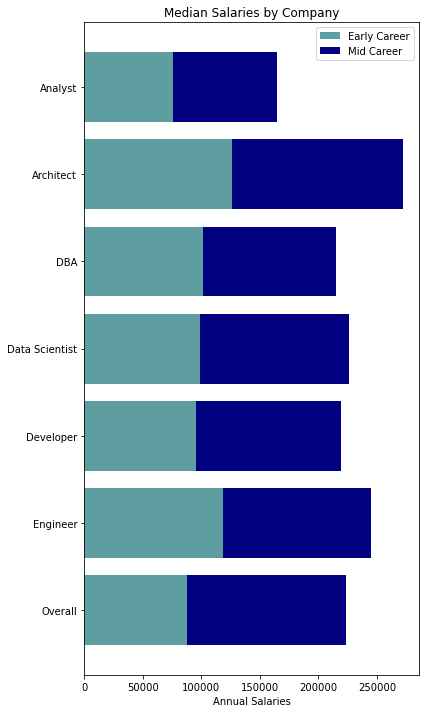

In [28]:
x = salary_pivot["Job Title"]
y1 = salary_pivot["Early Career Median Pay"]
y2 = salary_pivot["Mid-Career Median Pay"]
width = len(x)      # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(6,12))

plt.barh(x, y1, label='Early Career',color='cadetblue')
plt.barh(x, y2, left=y1,label='Mid Career',color='navy')
# plt.xticks(rotation=90)
ax.set_xlabel('Annual Salaries')
ax.set_title('Median Salaries by Company')
ax.legend()

plt.show()

In [29]:
tech_salaries_set = pd.DataFrame(tech_salaries[["Employer Name","Early Career Median Pay","Mid-Career Median Pay","Median Age","Years of Experience"]])
tech_salaries_set = tech_salaries_set[(tech_salaries_set["Employer Name"] != "SpaceX")].reset_index(drop=True)

tech_salaries_set[["Early Career Median Pay","Mid-Career Median Pay"]] = tech_salaries_set[["Early Career Median Pay","Mid-Career Median Pay"]].replace('[\$\,\.]',"",regex=True).astype(int)

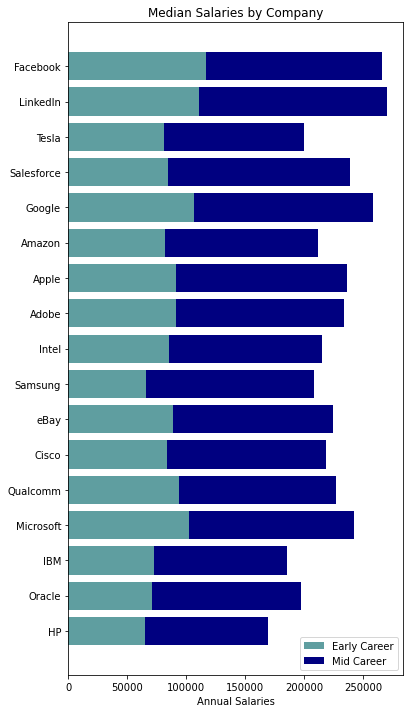

In [30]:
x = tech_salaries_set["Employer Name"]
y1 = tech_salaries_set["Early Career Median Pay"]
y2 = tech_salaries_set["Mid-Career Median Pay"]
width = len(x)      # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(6,12))

plt.barh(x, y1, label='Early Career',color='cadetblue')
plt.barh(x, y2, left=y1,label='Mid Career',color='navy')
# plt.xticks(rotation=90)
ax.set_xlabel('Annual Salaries')
ax.set_title('Median Salaries by Company')
ax.legend()

plt.show()